In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_excel('myexcel.xlsx')
df.head(10)
df.tail(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
448,Gordon Hayward,Utah Jazz,20,SF,26,2023-08-06 00:00:00,226,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5,SG,23,2023-08-06 00:00:00,206,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2,SF,28,2023-08-06 00:00:00,226,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23,SF,26,2023-06-06 00:00:00,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,2023-10-06 00:00:00,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,2023-03-07 00:00:00,231,Kansas,947276.0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [19]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [21]:
#filling  'College' with "Unknown"
df['College'] = df['College'].fillna("Unknown")

#Filling mean with salary
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [25]:
# Replacing the height column with random no between 150 and 180
np.random.seed(0)
df['Height']=np.random.randint(150,181)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,162,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,162,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,162,231,Unknown,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,162,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,162,179,Unknown,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,162,256,Unknown,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,162,231,Kansas,9.472760e+05


# Task 1 : Percentage split

In [29]:
count_team=df['Team'].value_counts()
percentage_team=(count_team/len(df)*100).round(2)
print("Count of Teams:\n",count_team)
print("\nTeam Percentages:\n",percentage_team)

Count of Teams:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentages:
 Team
New Orleans Pelicans      4.15
Memphis Grizzlies         

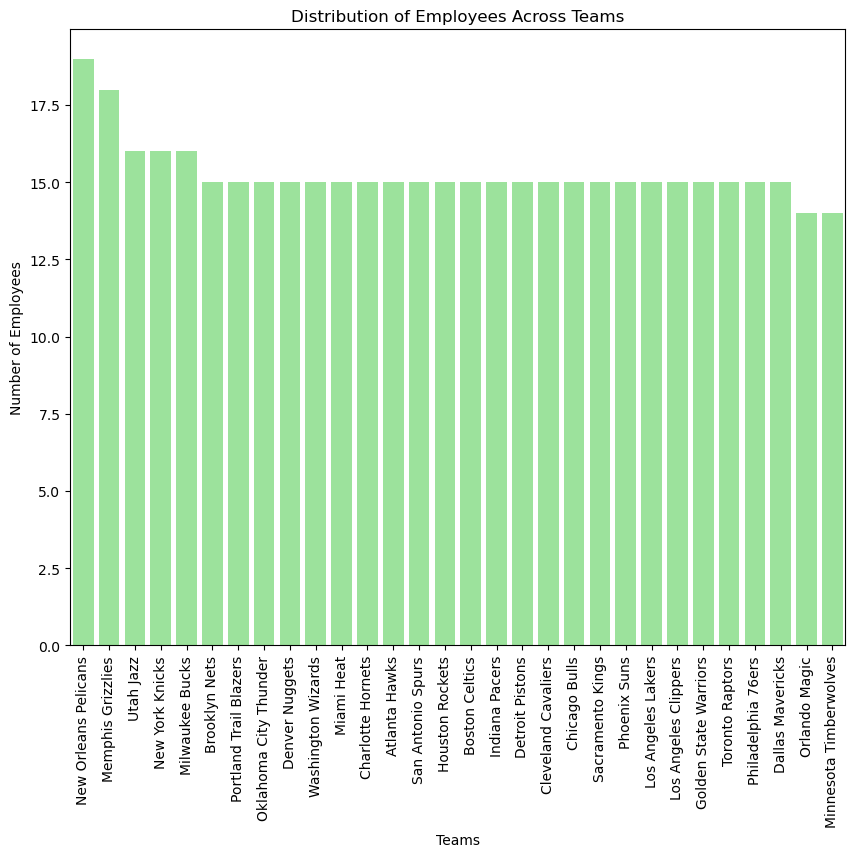

In [145]:
plt.figure(figsize=(10, 8))
sns.barplot(x=count_team.index, y=count_team.values, color='lightgreen')
plt.title("Distribution of Employees Across Teams")
plt.ylabel("Number of Employees")
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.show()

# Task 2 : Segregate Employees based on position

In [33]:
position_counts = df['Position'].value_counts()
position_counts


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

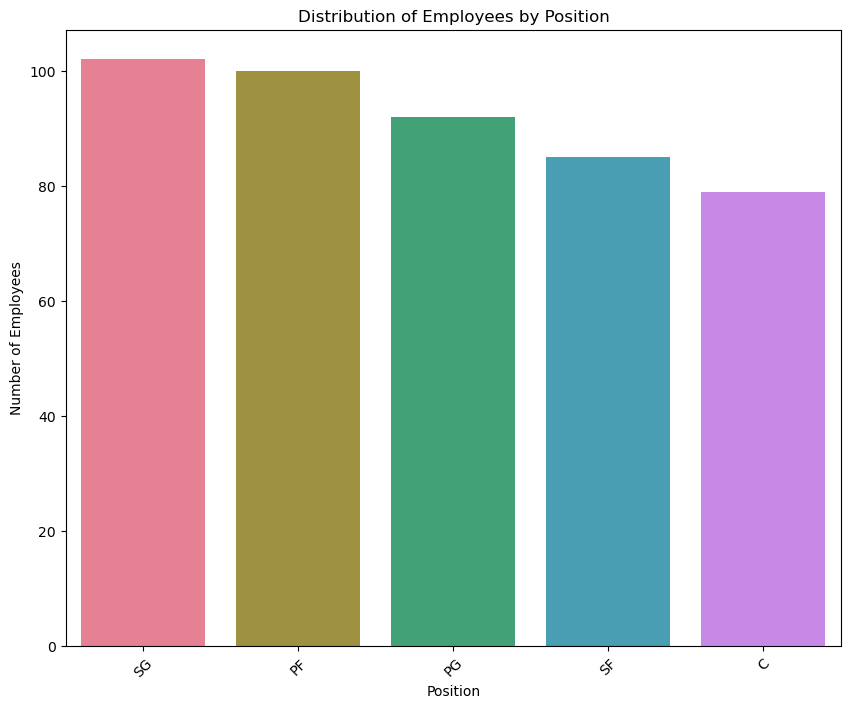

In [37]:
#Visualisation for Segregation
colors = sns.color_palette("husl", len(position_counts))

position_df = position_counts.reset_index()
position_df.columns = ['Position', 'Count']

plt.figure(figsize=(10, 8))
sns.barplot(x='Position', y='Count', data=position_df, palette=colors, hue='Position', dodge=False, legend=False)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# 3 : Identify predominant age group

In [66]:
age_groups = pd.cut(df['Age'], bins=[20, 25, 30, 35, 40, 45], labels=['20-25', '25-30', '30-35', '35-40', '40-45'])
age_group_counts = age_groups.value_counts().sort_index()
print(age_group_counts)

Age
20-25    179
25-30    167
30-35     68
35-40     23
40-45      0
Name: count, dtype: int64


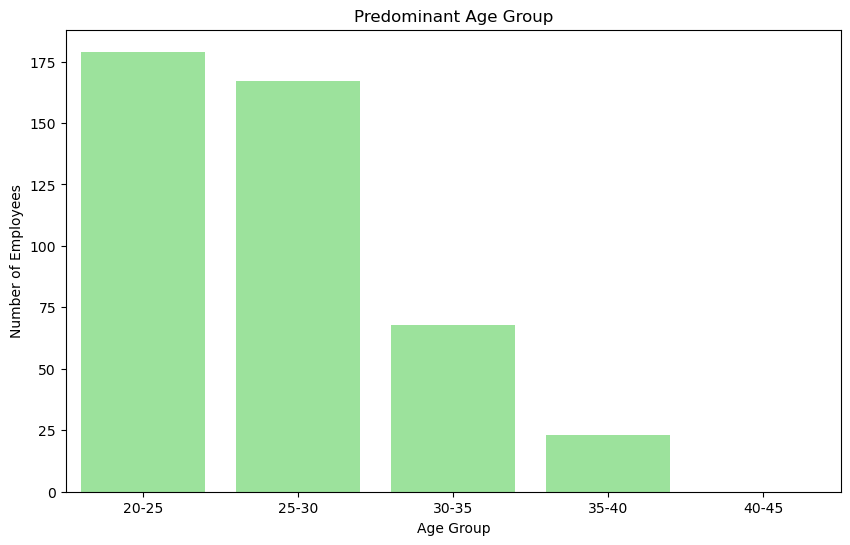

In [124]:
# Visualization for Task 3
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='lightgreen')
plt.title("Predominant Age Group")
plt.ylabel("Number of Employees")
plt.xlabel("Age Group")
plt.show()

# 4 : Salary Expenditure

In [101]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
highest_team_salary = team_salary.idxmax()
highest_position_salary = position_salary.idxmax()

print("Highest saliried Team :\n",highest_team_salary)
print("\nHighest saliried Position :\n", highest_position_salary)

Highest saliried Team :
 Cleveland Cavaliers

Highest saliried Position :
 C


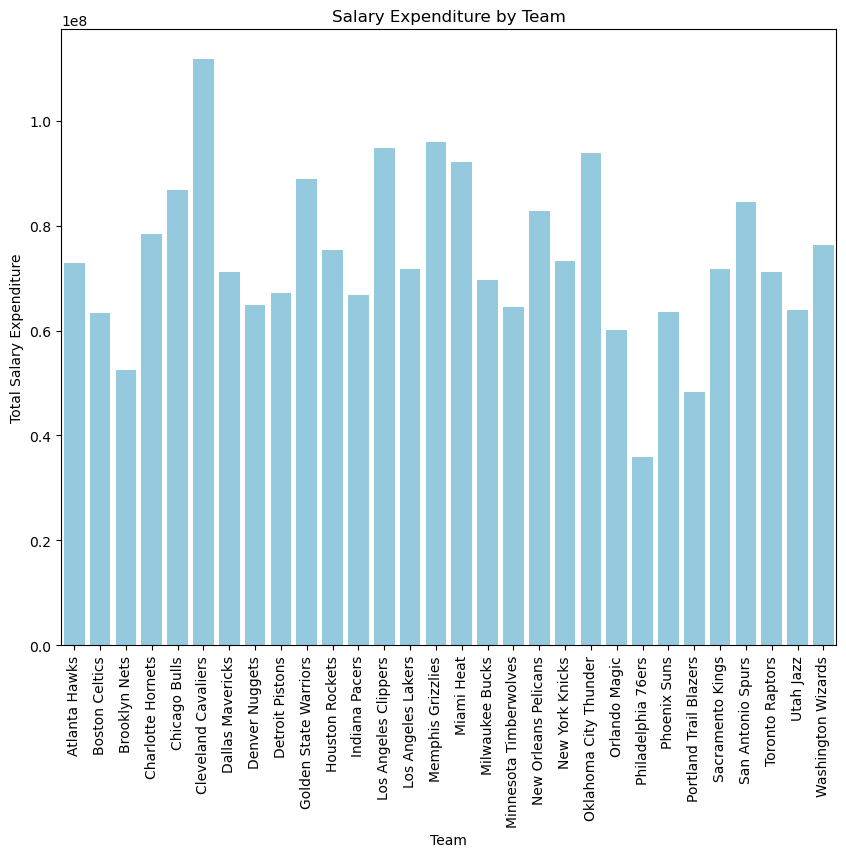

In [103]:
plt.figure(figsize=(10, 8))
sns.barplot(x=team_salary.index, y=team_salary.values, color='skyblue')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=90)
plt.show()

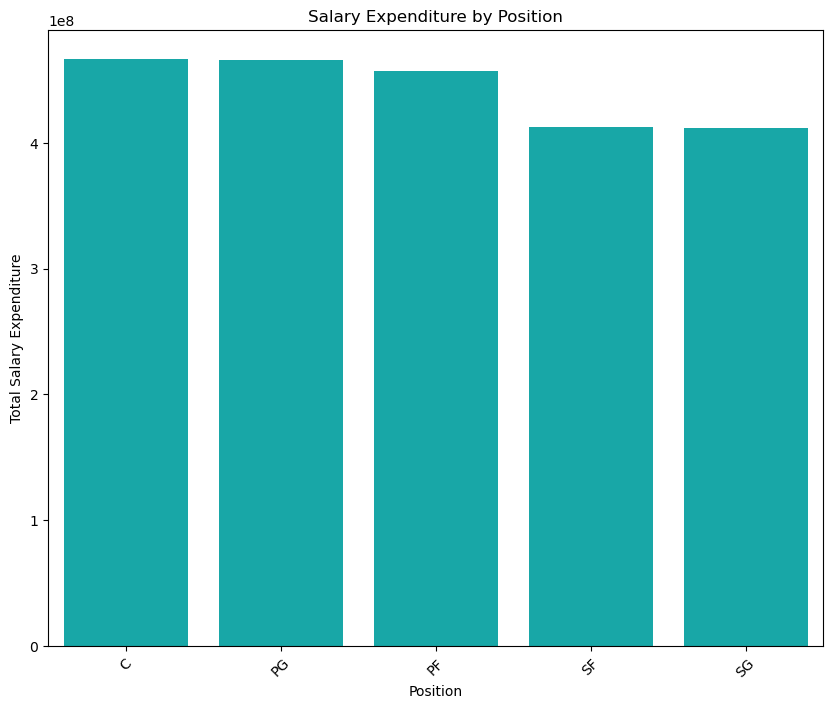

In [99]:
position_salary_expenditure_sorted = position_salary.sort_values(ascending=False)

# Visualization for Task 4: Salary Expenditure by Position with bars

plt.figure(figsize=(10, 8))
sns.barplot(x=position_salary_expenditure_sorted.index, y=position_salary_expenditure_sorted.values, color='c')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

# 5: Correlation between age and salary

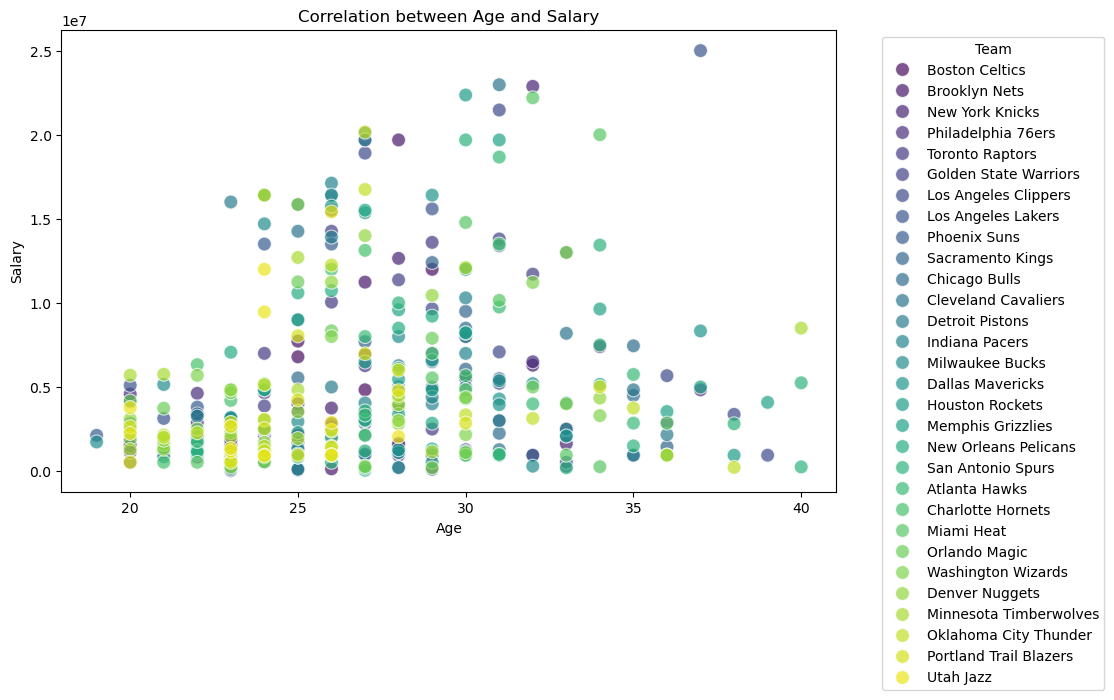

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Team',palette='viridis', s=100, alpha=0.7)
plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()